In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np

# Clustering Hiérarchique

## Objectifs :
- Comprendre l'algorithme 
- L'appliquer sur des données synthétiques et réelles
- Comparer avec d'autres méthodes de clustering

## Définition :

Le clustering hiérarchique est une méthode d'apprentissage non supervisé permettant de regrouper des points 
en formant une hiérarchie de clusters.

Deux grandes approches existent :
- Ascendante : on commence avec chaque point comme un cluster et on fusionne progressivement.
- Descendante : on commence avec un seul cluster englobant tous les points et on divise récursivement.

### Algorithme ascendant (agglomératif): (A connaitre)
1. Initialiser chaque point comme un cluster.
2. Calculer la matrice des distances entre chaque paire de clusters.
3. Fusionner les deux clusters les plus proches selon une méthode de linkage.
4. Répéter jusqu'à obtention d'un seul cluster ou selon un critère d'arrêt.


### Explication des méthodes de linkage

Les méthodes de linkage déterminent comment la distance entre clusters est calculée :
- Single linkage : Distance minimale entre les points de deux clusters.
- Complete linkage : Distance maximale entre les points de deux clusters.
- Average linkage : Moyenne des distances entre les points de deux clusters.
- Ward : Minimisation de la variance intra-cluster:


#### Définition de l'inertie intra-classe
L'inertie intra-classe est définie par :
$$ I_{\text{intra}} = \sum_{C} \sum_{i \in C} \|X_i - G_C\|^2$$




Inertie tot = Inertie Inter + Inertie Intra

Distance de Manhattan --> Carré

Définir des fonctions permettant de calculer les distances:
 - **Distance Euclidienne** :
     $$ d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$
        
 - **Distance de Manhattan** :
    $$ d(x, y) = \sum_{i=1}^{n} |x_i - y_i| $$

 - **Distance de Mahalanobis** :
     $$ d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)},$$
    $S \text{ matrice de covariance des points }x$
        
   

In [3]:
def euclidean_distance(x, y):
    return np.sqrt(sum((a-b)**2 for a,b in zip(x,y)))

def manhattan_distance(x, y):
    return sum(abs(a-b) for a,b in zip(x,y))

def hamming_distance(x, y):
    return sum(a!=b for a,b in zip(x,y))

In [ ]:
# calculateMahalanobis function to calculate 
# the Mahalanobis distance 


def mahalanobis_distance(x, y, cov=None):
    if cov is None:
        cov = np.identity(len(x))
    cov_inv = np.linalg.inv(cov)
    return np.sqrt((x-y) @ cov_inv @ (x-y))

    


2.205365358310583
2.205365358310583


Défnir les fonctions :

- isobarycentre d'un cluster
- inertie intra-classe (norme 2 depuis centre de gravité)
- inertie totale
- inertie expliquée (inertie inter/ inertie total * 100) avec inertie inter = inertie total - inta donc inertie expliqué = 1 - intra/total

In [5]:
def compute_barycenter(cluster):
    """Calcule le barycentre d'un cluster."""
    return np.mean(cluster, axis=0)
    

def inertia_intra_class(clusters):
    """Calcule l'inertie intra-classe d'une partition."""
    inertia = 0
    for cluster in clusters:
        barycenter = compute_barycenter(cluster)
        inertia += sum(np.linalg.norm(point - barycenter) for point in cluster) #Norme 2 = seconde somme
    return inertia

def total_inertia(points):
    """Calcule l'inertie totale du dataset."""
    barycenter = np.mean(points, axis=0)
    return sum(np.linalg.norm(point - barycenter) for point in points)


def explained_inertia(intra, total):
    """Calcule le pourcentage d'inertie expliquée."""
    return (1 - intra / total)*100


Définir les fonctions qui permettent de lier les clusters suivant:
- Single linkage : Distance minimale entre les points de deux clusters.
- Complete linkage : Distance maximale entre les points de deux clusters.
- Average linkage : Moyenne des distances entre les points de deux clusters.
- Ward : Minimisation de la variance intra-cluster

In [ ]:
def single_linkage(cluster1, cluster2):
    """Distance minimale entre les points de deux clusters."""
    return np.min([np.linalg.norm(a - b) for a in cluster1 for b in cluster2])

def complete_linkage(cluster1, cluster2):
    """Distance maximale entre les points de deux clusters."""
    return np.max([np.linalg.norm(a - b) for a in cluster1 for b in cluster2])
    

def average_linkage(cluster1, cluster2):
    """Moyenne des distances entre les points de deux clusters."""
    return np.mean([np.linalg.norm(a - b) for a in cluster1 for b in cluster2])
    

def ward_linkage(cluster1, cluster2):
    """Minimisation de la variance intra-cluster."""
    size1, size2 = len(cluster1), len(cluster2)
    barycenter1, barycenter2 = compute_barycenter(cluster1), compute_barycenter(cluster2)
    return np.linalg.norm(barycenter1 - barycenter2) * np.sqrt(size1 * size2 / (size1 + size2))



#### Exemple à la main
On considère le tableau de données suivant où 4 individus (ici des points) A, B, C et D sont décrit sur deux
variables (X1 et X2):

|individu| X1  | X2 |
| --- | -- | ------ |
|A    | 5  | 4      |
|B    | 4  | 5      |
|C    | 1  | -2     |
|D    | 0  | -3     |


1. Constuire le dendrogramme du lien maximum des 4 individus.
2. Constuire le dendrogramme de Ward en pondérant les individus par 1.
3. Calculer l’inertie intra-classe de la partition en deux classes issue du dendrogramme de Ward.
4. Calculer l’inertie totale et en déduire le pourcentage d’inertie expliquée par cette partition.

Matrice des distances:
[[0.         1.41421356 7.21110255 8.60232527]
 [1.41421356 0.         7.61577311 8.94427191]
 [7.21110255 7.61577311 0.         1.41421356]
 [8.60232527 8.94427191 1.41421356 0.        ]]


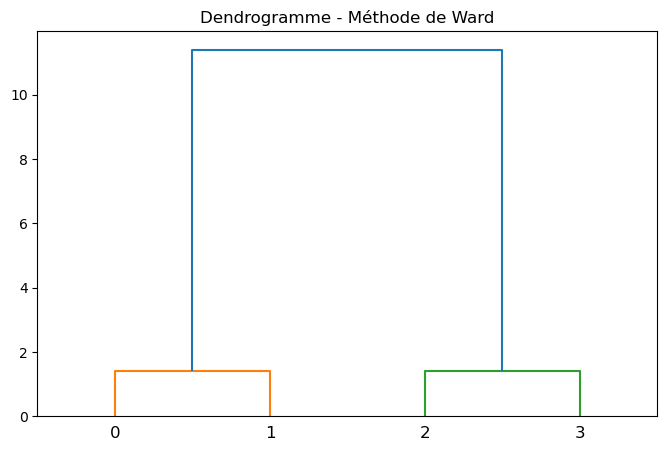

Inertie totale: 16.25
Inertie intra-classe: 2.83
Pourcentage d'inertie expliquée: 82.59%


In [6]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def calculate_distance_matrix(points):
    """Calcule la matrice des distances euclidiennes."""
    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist_matrix[i, j] = dist_matrix[j, i] = euclidean_distance(points[i],
                                                                      points[j])
    return dist_matrix







# Exemple de points
data = np.array([[5, 4], [4, 5], [1, -2], [0, -3]])
dist_matrix = calculate_distance_matrix(data)
print("Matrice des distances:")
print(dist_matrix)



# Calcul des dendrogrammes
linkage_matrix = linkage(data, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogramme - Méthode de Ward")
plt.show()

total_inertia_value = total_inertia(data)
intra_inertia_value = inertia_intra_class([data[:2], data[2:]])
inertia_explained = explained_inertia(intra_inertia_value, total_inertia_value)

print(f"Inertie totale: {total_inertia_value:.2f}")
print(f"Inertie intra-classe: {intra_inertia_value:.2f}")
print(f"Pourcentage d'inertie expliquée: {inertia_explained:.2f}%")



Tracer la courbe de pourcentage d'inertie expliquée en fonction du nombre de clusters k.
Trouver le nombre de clusters.

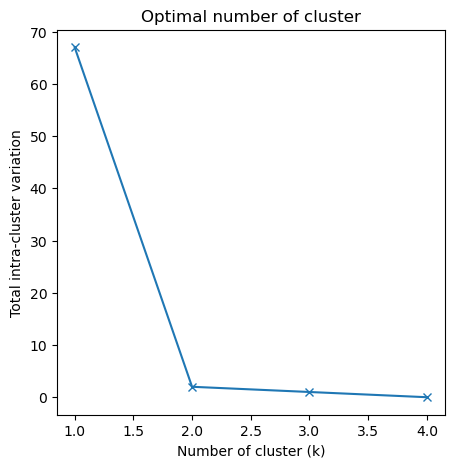

In [8]:
from sklearn.cluster import AgglomerativeClustering

def inertia_calculation(K, data):
    WSS = []
    for i in range(K):
        cluster = AgglomerativeClustering(n_clusters= i+1, metric='euclidean', linkage='average')  
        cluster.fit_predict(data)
        # cluster index
        label = cluster.labels_
        wss = []
        for j in range(i+1):
            # extract each cluster according to its index
            idx = [t for t, e in enumerate(label) if e == j]
            cluster = data[idx,]
            # calculate the WSS:
            cluster_mean = cluster.mean(axis=0)
            distance = np.sum(np.abs(cluster - cluster_mean)**2,axis=-1)
            wss.append(sum(distance))
        WSS.append(sum(wss))
    return WSS


inertia=inertia_calculation(4, data)

cluster_range = range(1, 5)

plt.figure(figsize=(5,5))
plt.title('Optimal number of cluster')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Total intra-cluster variation')
plt.plot(cluster_range, inertia, marker = "x")



### Exemple avec la bibliothèque sklearn

Silhouette Score Clustering Hiérarchique : 0.7302469866551887


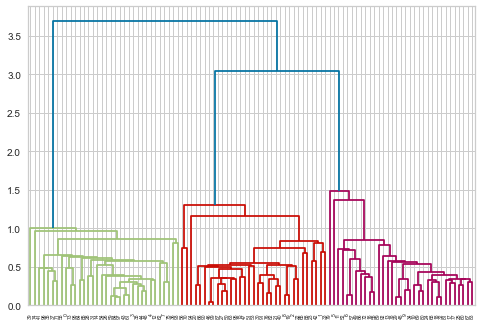

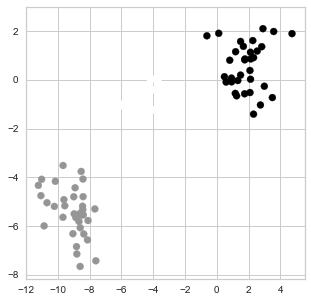

In [58]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 

# création du dataset
n_samples = 100
random_state = 170
X, y = make_blobs(n_samples = n_samples, random_state = random_state)
X = pd.DataFrame(X, columns = ['abscisse','ordonnée'])

# représentation du dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)

# Segmentation à l'aide d'une CAH
y_pred = AgglomerativeClustering(n_clusters = 3).fit_predict(X)

# Visualisation du résultat
plt.figure(figsize = (5,5))
plt.scatter(X['abscisse'],X['ordonnée'],c = y_pred);

# Score Silhouette pour Hierarchical Clustering
from sklearn.metrics import silhouette_score

hierarchical_silhouette = silhouette_score(X,y_pred)
print(f"Silhouette Score Clustering Hiérarchique : {hierarchical_silhouette}")



In [55]:
# Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [1]:
# Application du Clustering Hiérarchique sur Iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

iris = load_iris()
# Création du modèle de clustering hiérarchique
hierarchical = AgglomerativeClustering(n_clusters=3)  # On sait que Iris a 3 classes
hierarchical_labels = hierarchical.fit_predict(X_iris)

# Visualisation
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=hierarchical_labels, cmap="coolwarm", s=20)
plt.title("Clustering Hiérarchique sur le dataset Iris")
plt.show()


NameError: name 'X_iris' is not defined

In [7]:
# Comparaison des scores silhouette entre DBSCAN et Hiérarchical
from sklearn.metrics import silhouette_score

# Score Silhouette pour DBSCAN (on vérifie qu'il y a plus d'un cluster)
if len(set(iris_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_iris, iris_labels)
else:
    dbscan_silhouette = "Non applicable (1 seul cluster détecté)"

# Score Silhouette pour Hierarchical Clustering
hierarchical_silhouette = silhouette_score(X_iris, hierarchical_labels)

print(f"Silhouette Score DBSCAN : {dbscan_silhouette}")
print(f"Silhouette Score Clustering Hiérarchique : {hierarchical_silhouette}")


Silhouette Score DBSCAN : 0.35651648142700726
Silhouette Score Clustering Hiérarchique : 0.4466890410285909


# Mall_Customers

Matrice des distances:
[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


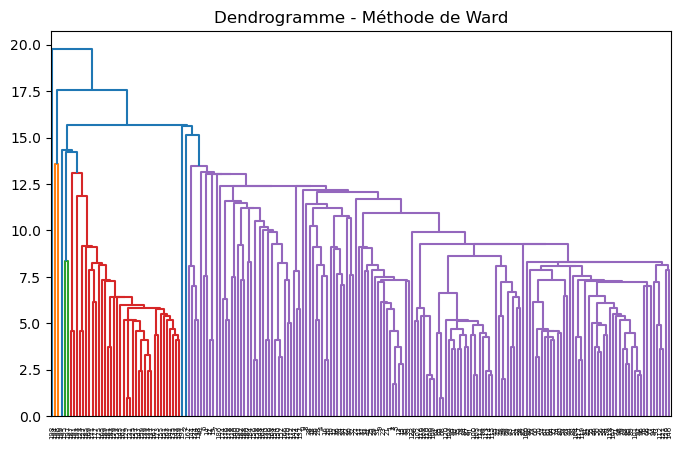

Inertie totale: 7116.65
Inertie intra-classe: 7053.40
Pourcentage d'inertie expliquée: 0.89%


In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def calculate_distance_matrix(points):
    """Calcule la matrice des distances euclidiennes."""
    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist_matrix[i, j] = dist_matrix[j, i] = euclidean_distance(points[i],
                                                                      points[j])
    return dist_matrix







# Exemple de points
data = pd.read_csv('C:/Users/LENOVO/Desktop/DataMining/Mall_Customers.csv')
data = data[['Age','Annual Income (k$)', 'Spending Score (1-100)']].values



dist_matrix = calculate_distance_matrix(data)
print("Matrice des distances:")
print(dist_matrix)



# Calcul des dendrogrammes
linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogramme - Méthode de Ward")
plt.show()

total_inertia_value = total_inertia(data)
intra_inertia_value = inertia_intra_class([data[:2], data[2:]])
inertia_explained = explained_inertia(intra_inertia_value, total_inertia_value)

print(f"Inertie totale: {total_inertia_value:.2f}")
print(f"Inertie intra-classe: {intra_inertia_value:.2f}")
print(f"Pourcentage d'inertie expliquée: {inertia_explained:.2f}%")



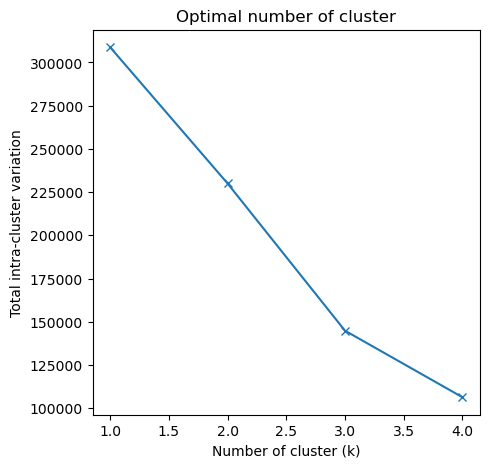

In [18]:
from sklearn.cluster import AgglomerativeClustering

def inertia_calculation(K, data):
    WSS = []
    for i in range(K):
        cluster = AgglomerativeClustering(n_clusters= i+1, metric='euclidean', linkage='average')  
        cluster.fit_predict(data)
        # cluster index
        label = cluster.labels_
        wss = []
        for j in range(i+1):
            # extract each cluster according to its index
            idx = [t for t, e in enumerate(label) if e == j]
            cluster = data[idx,]
            # calculate the WSS:
            cluster_mean = cluster.mean(axis=0)
            distance = np.sum(np.abs(cluster - cluster_mean)**2,axis=-1)
            wss.append(sum(distance))
        WSS.append(sum(wss))
    return WSS


inertia=inertia_calculation(4, data)

cluster_range = range(1, 5)

plt.figure(figsize=(5,5))
plt.title('Optimal number of cluster')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Total intra-cluster variation')
plt.plot(cluster_range, inertia, marker = "x")



Silhouette Score Clustering Hiérarchique : 0.7302469866551887


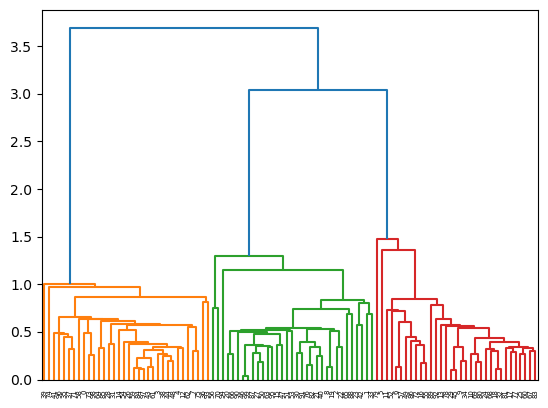

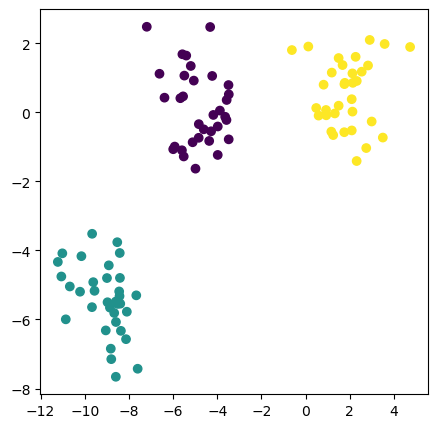

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 

# création du dataset
n_samples = 100
random_state = 170
X, y = make_blobs(n_samples = n_samples, random_state = random_state)
X = pd.DataFrame(X, columns = ['abscisse','ordonnée'])

# représentation du dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)

# Segmentation à l'aide d'une CAH
y_pred = AgglomerativeClustering(n_clusters = 3).fit_predict(X)

# Visualisation du résultat
plt.figure(figsize = (5,5))
plt.scatter(X['abscisse'],X['ordonnée'],c = y_pred);

# Score Silhouette pour Hierarchical Clustering
from sklearn.metrics import silhouette_score

hierarchical_silhouette = silhouette_score(X,y_pred)
print(f"Silhouette Score Clustering Hiérarchique : {hierarchical_silhouette}")

